# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

# Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. The nature of predictions made by the classification model will translate as follows:

 - True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
  - False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
  - False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

# Data Description

 - The data provided is a transformed version of original data which was collected using sensors.
 - Train.csv - To be used for training and tuning of models.
 - Test.csv - To be used only for testing the performance of the final best model.
 - Both the datasets consist of 40 predictor variables and 1 target variable

# Importing Libraries

In [87]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)


<IPython.core.display.Javascript object>

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import os

import warnings

warnings.filterwarnings("ignore")

# importing KNN Imputer for imputation of data
from sklearn.impute import KNNImputer

# to calculate metrics for our models
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# to build our models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

from xgboost import XGBClassifier

# to split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# for imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# for hypertuning parameters
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

<IPython.core.display.Javascript object>

# Loading Data

In [4]:
os.getcwd()

'C:\\Users\\Samuel'

<IPython.core.display.Javascript object>

In [5]:
os.chdir("D:\Python")

<IPython.core.display.Javascript object>

In [6]:
os.getcwd()

'D:\\Python'

<IPython.core.display.Javascript object>

In [7]:
df = pd.read_csv("Train.csv")

<IPython.core.display.Javascript object>

In [8]:
data = df.copy()

<IPython.core.display.Javascript object>

# EDA

In [7]:
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0
5,0.159623,-4.233781,-0.264310,-5.477119,-0.190854,-0.356274,-0.134486,4.066608,-3.858569,1.692441,...,3.227235,0.628900,-1.548860,1.321979,5.461345,1.109410,-3.869993,0.273964,2.805941,0
6,-0.184565,-4.721470,0.864988,-3.078695,-2.226888,-1.282220,-0.804717,3.289733,-1.567971,0.749904,...,-0.544941,-0.762921,0.815558,1.889373,3.624347,1.555740,-5.432884,0.678703,0.464697,0
7,1.734840,1.682945,-1.269070,4.600630,-1.416975,-2.543916,0.131648,-0.198661,3.094057,-1.109324,...,1.717474,-3.838931,1.569448,1.794899,-4.268517,-0.516195,-0.619218,-0.830889,-4.967266,1
8,1.781583,1.314664,4.248690,-0.518293,-0.149044,0.033082,-1.087893,-3.117561,0.624935,1.567455,...,1.611014,2.951390,-1.862016,4.389598,1.371300,-2.516235,0.770496,0.831132,-2.310953,0
9,-0.894140,4.011498,5.251902,3.320747,0.727067,-4.771070,1.031232,3.632080,-1.391444,-1.966746,...,-0.635742,-4.449139,2.296340,1.575110,1.376268,0.596757,-1.413652,0.543871,0.035020,0


<IPython.core.display.Javascript object>

In [8]:
data.shape

(20000, 41)

<IPython.core.display.Javascript object>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

<IPython.core.display.Javascript object>

In [10]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [11]:
data.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

 - There are two columns, V1 and V2, that each have 18 missing values. We will need to impute these to avoid losing data by just dropping them. We will do this before splitting our data.

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


<IPython.core.display.Javascript object>

## Univariate Analysis

In [9]:
# function to plot a boxplot and a histogram along the same scale
# we are using this plot for our non-categorical variables
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

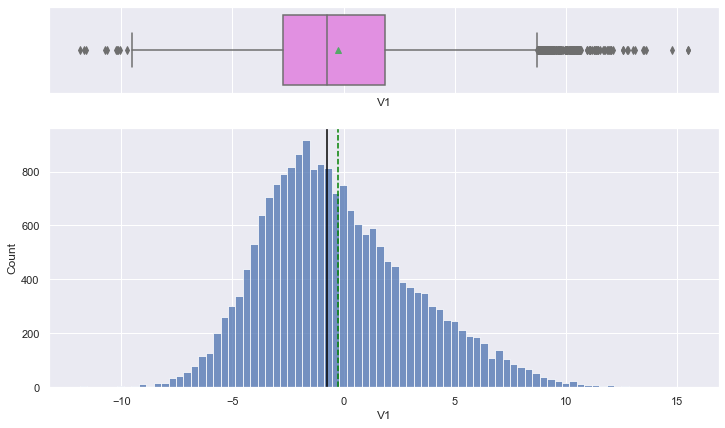

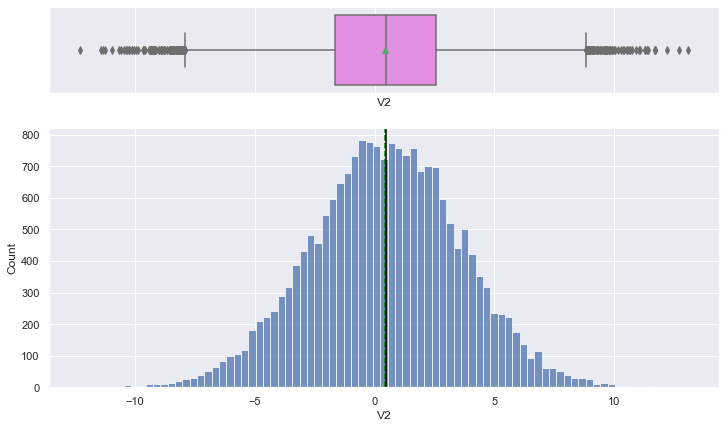

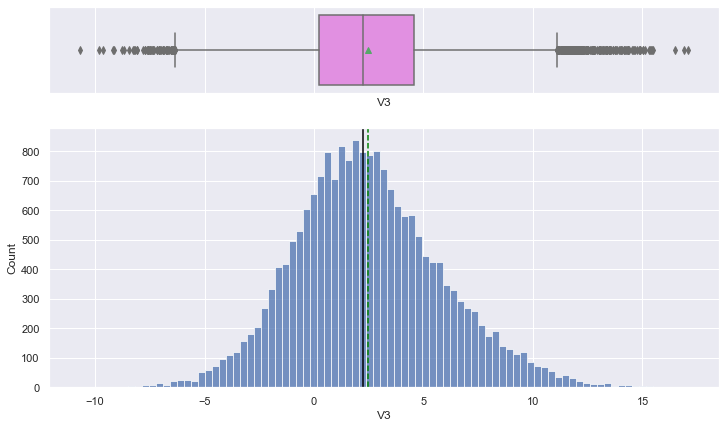

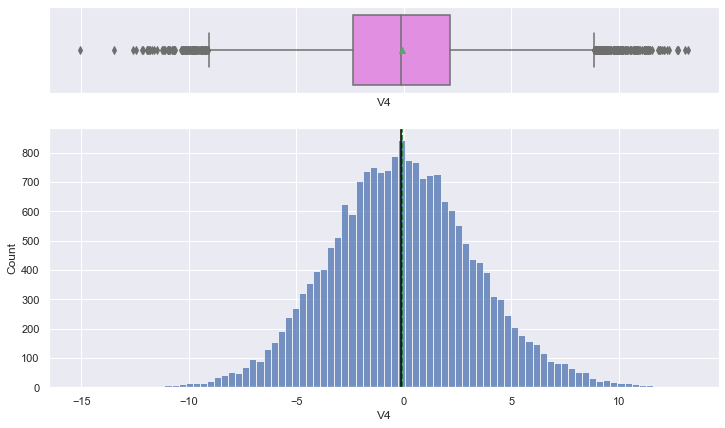

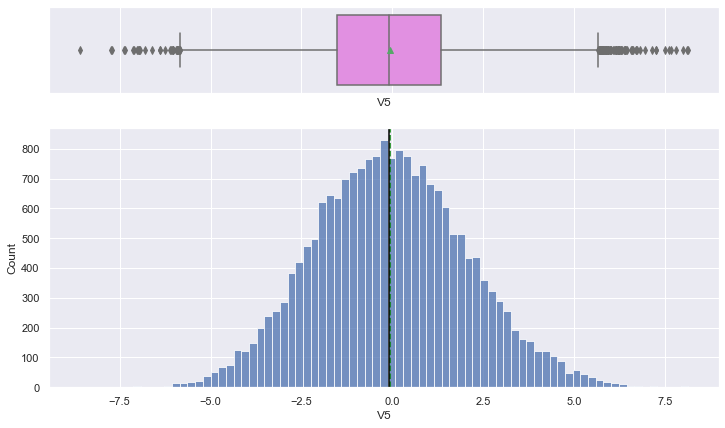

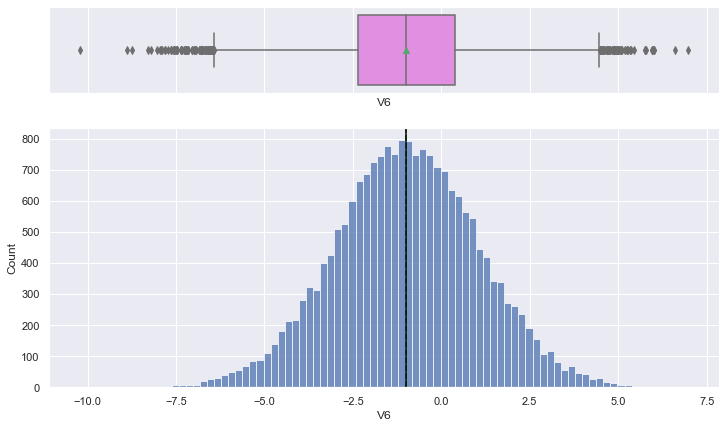

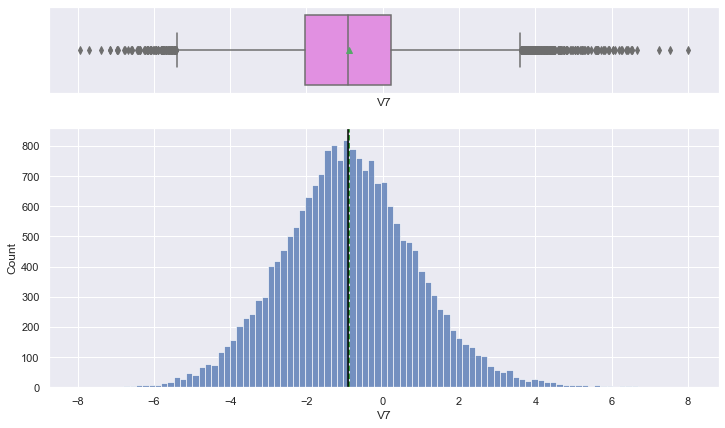

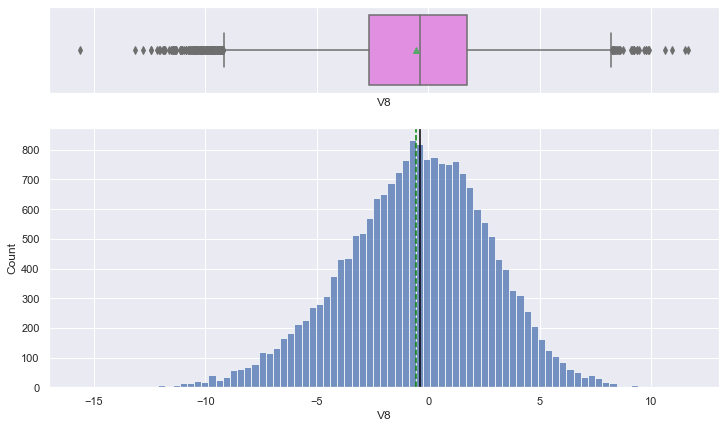

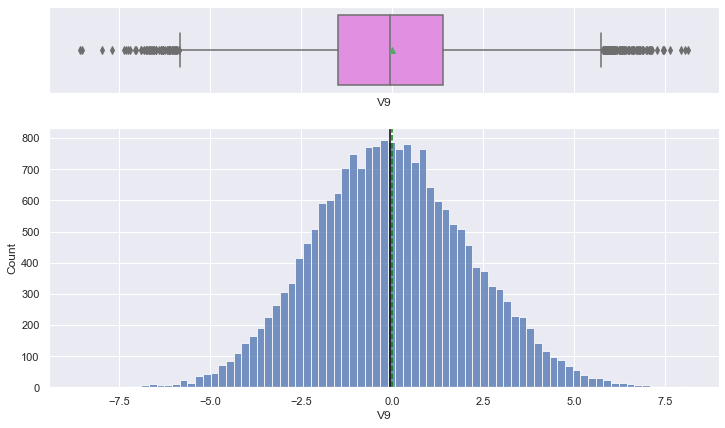

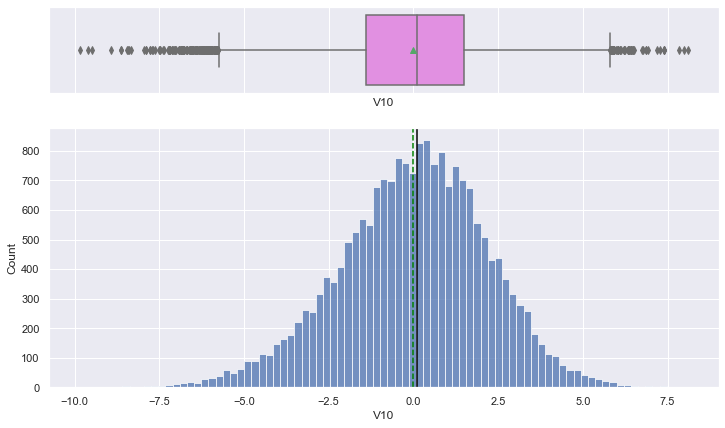

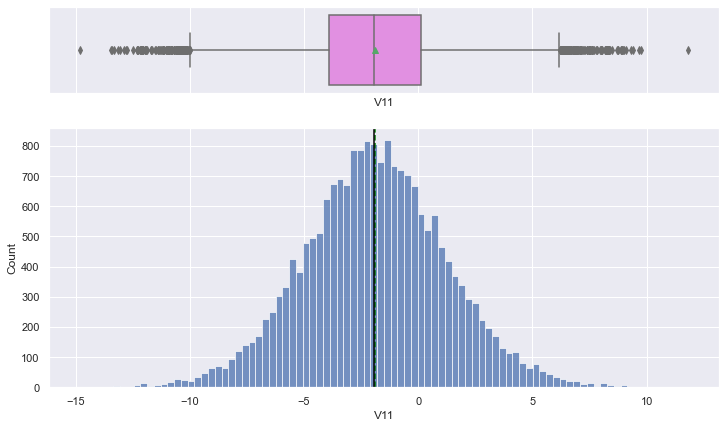

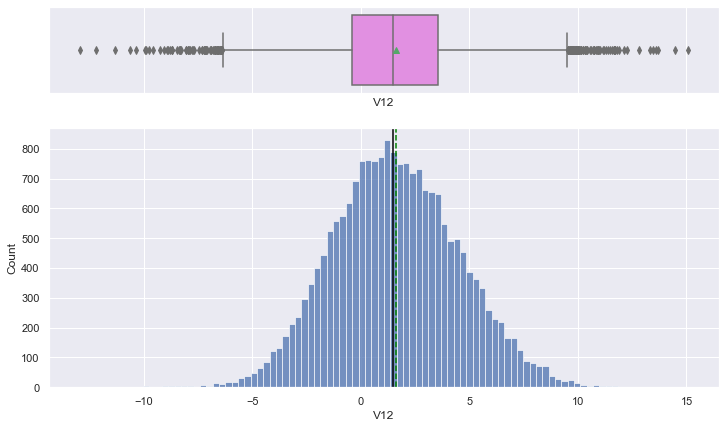

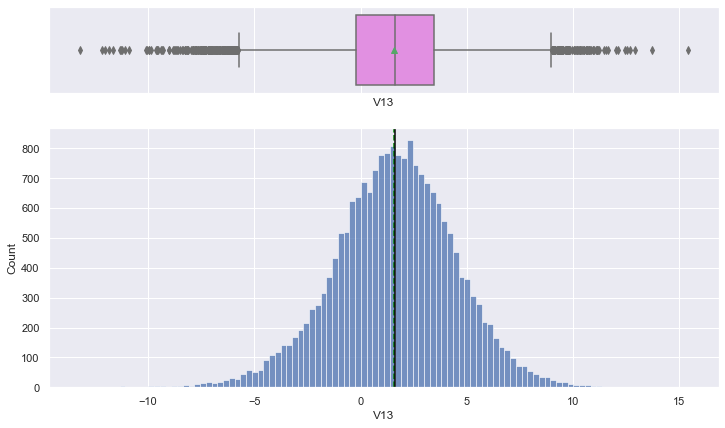

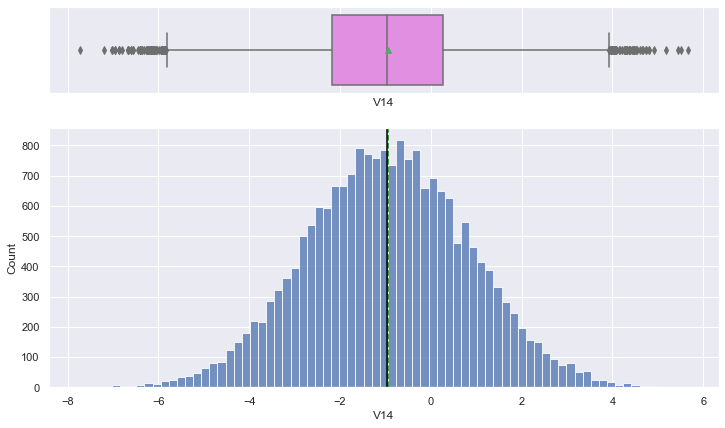

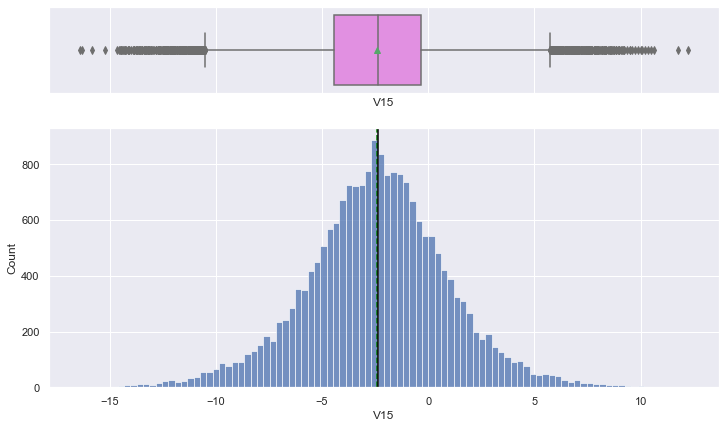

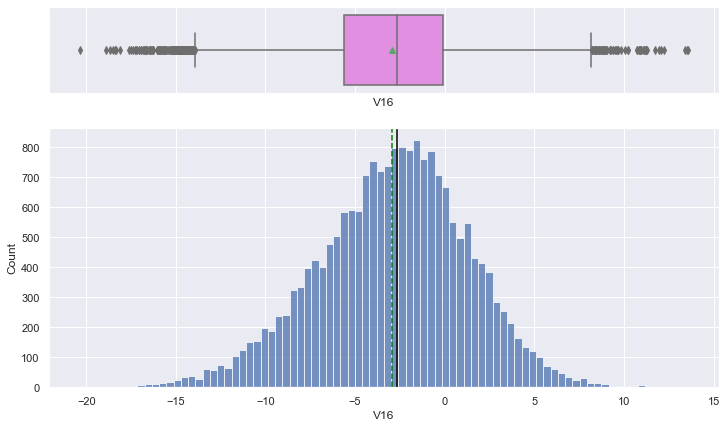

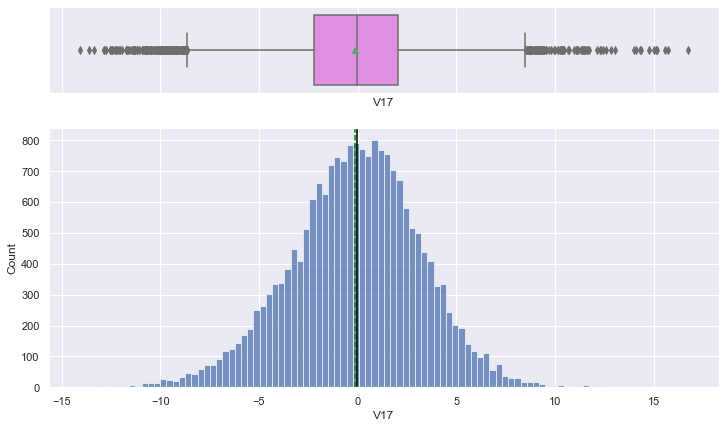

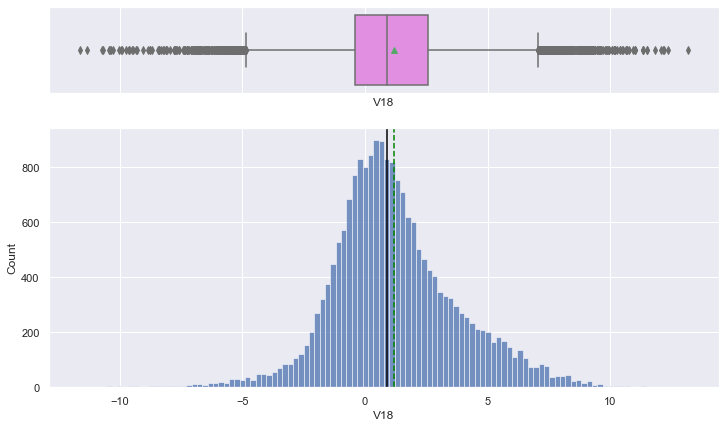

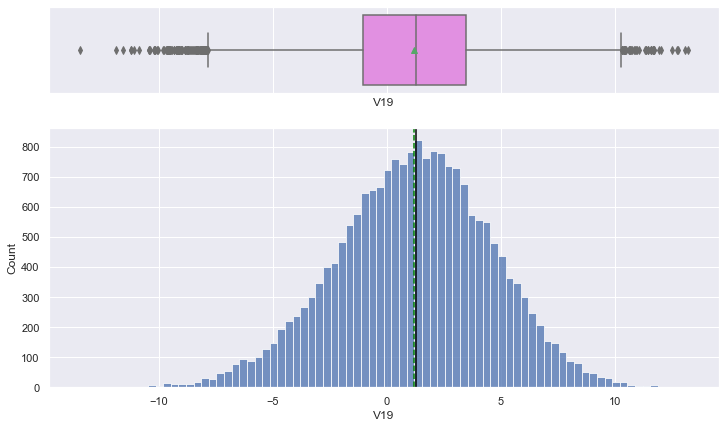

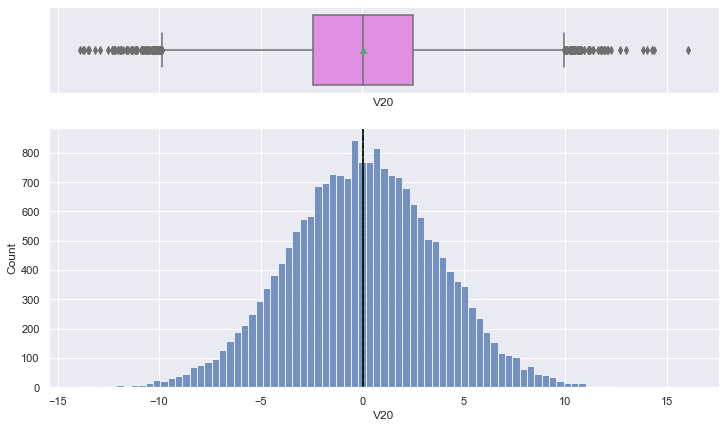

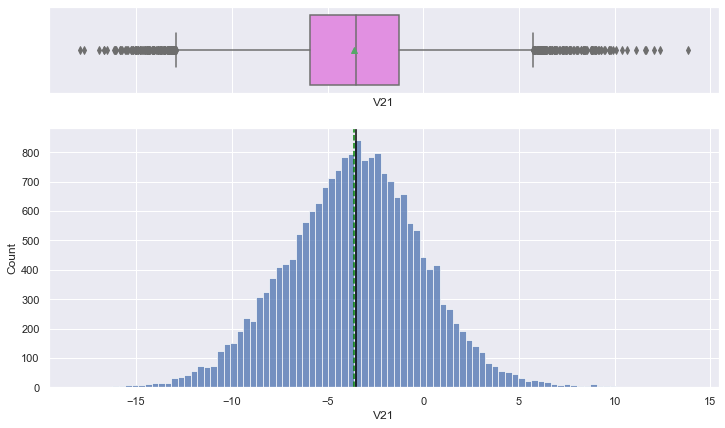

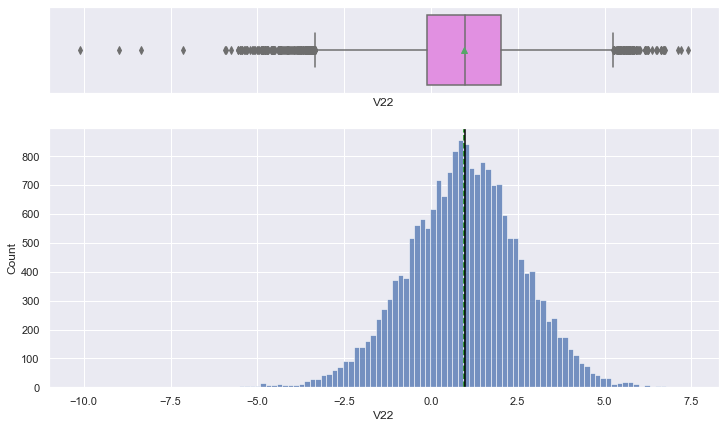

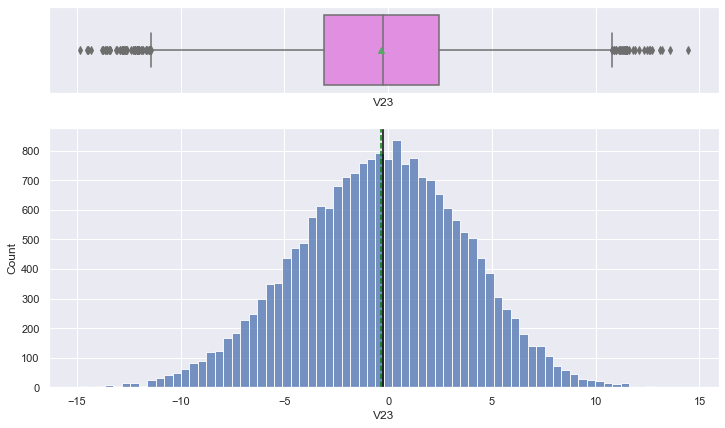

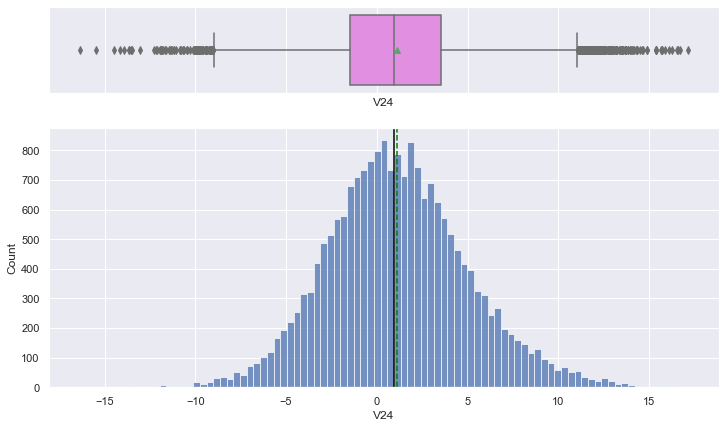

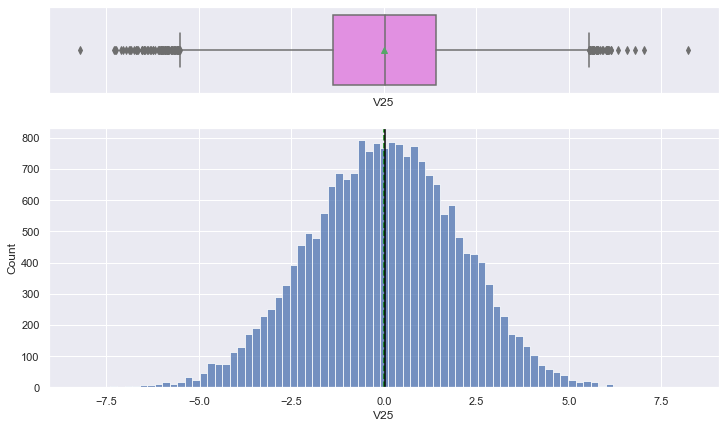

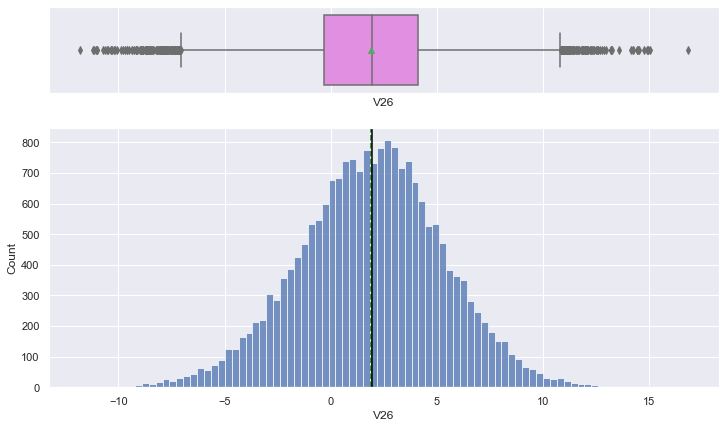

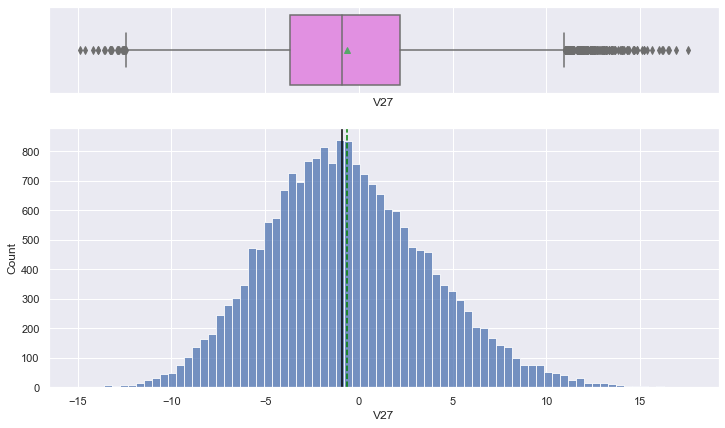

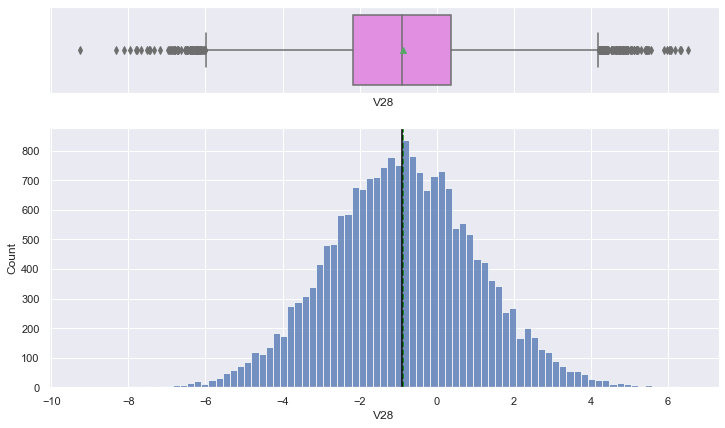

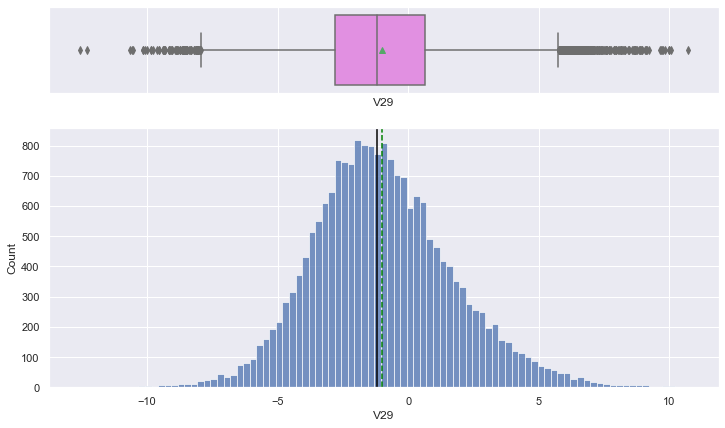

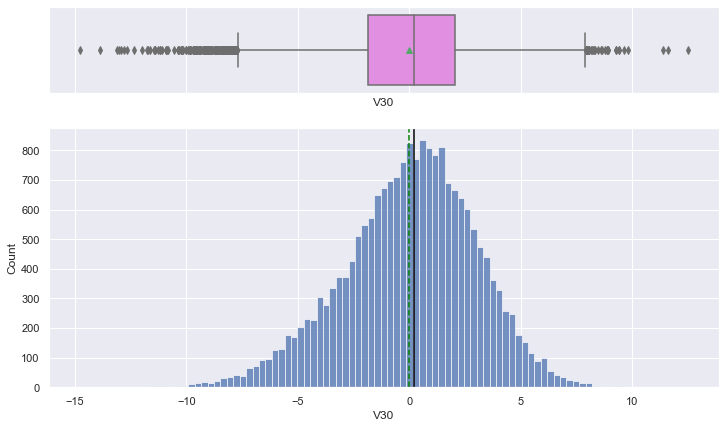

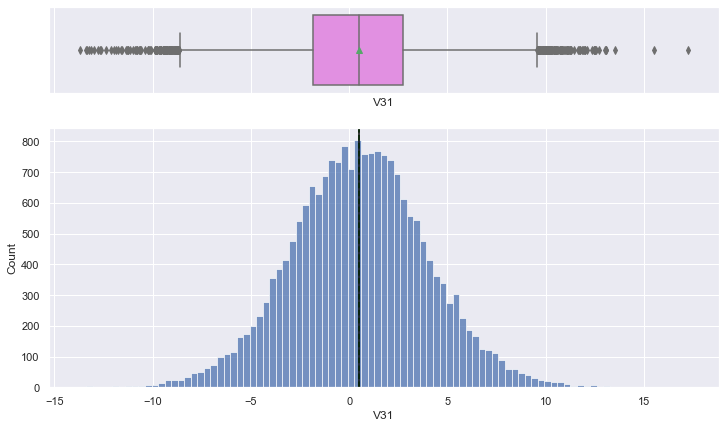

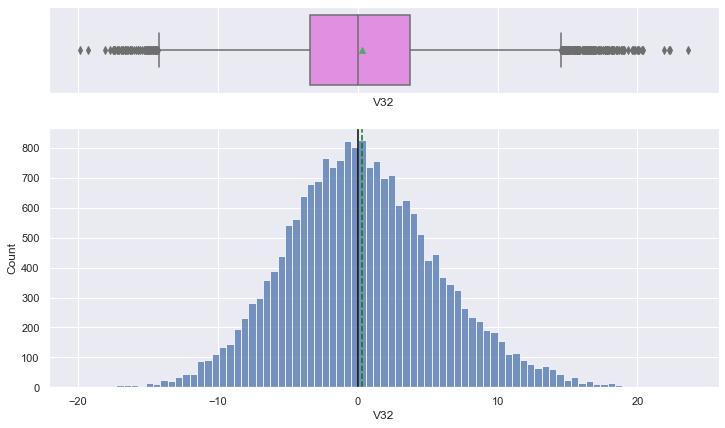

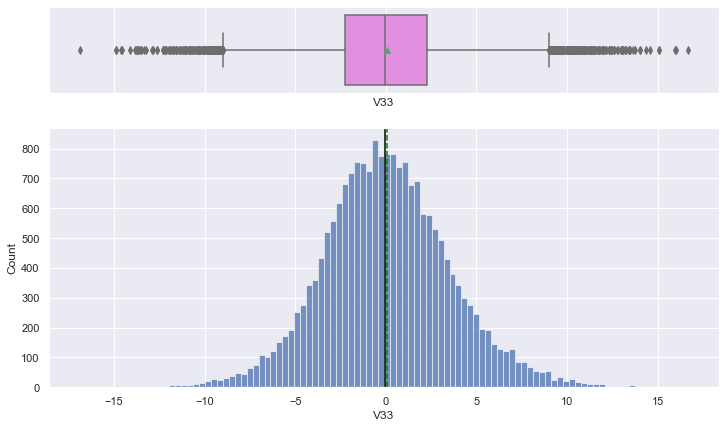

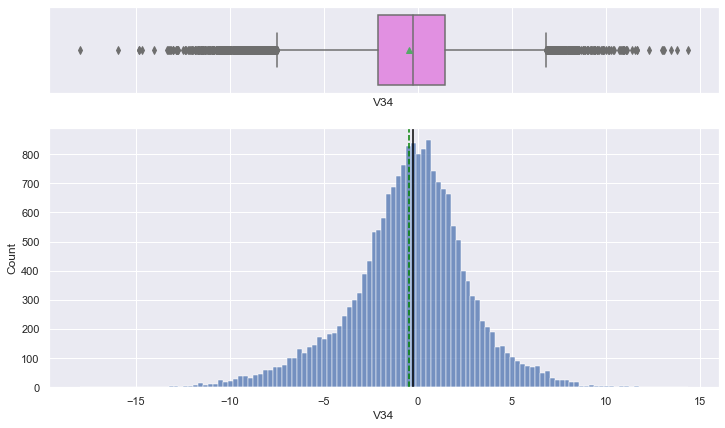

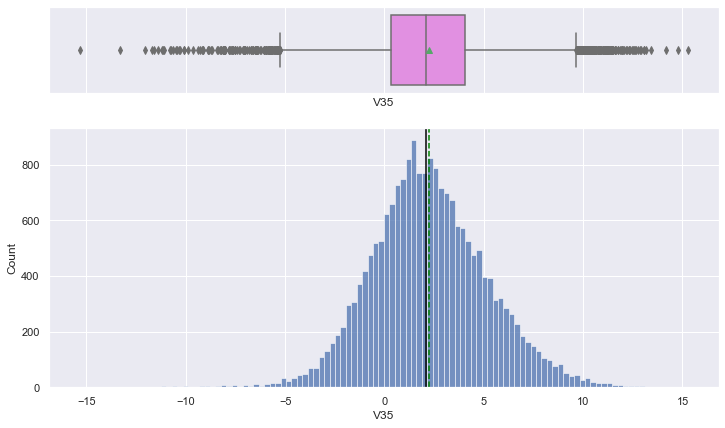

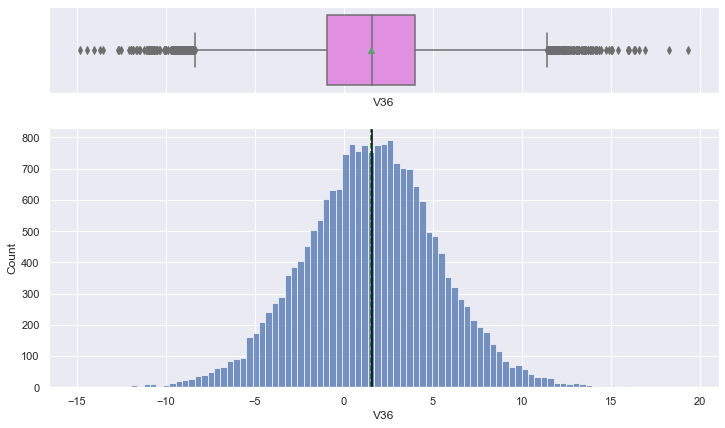

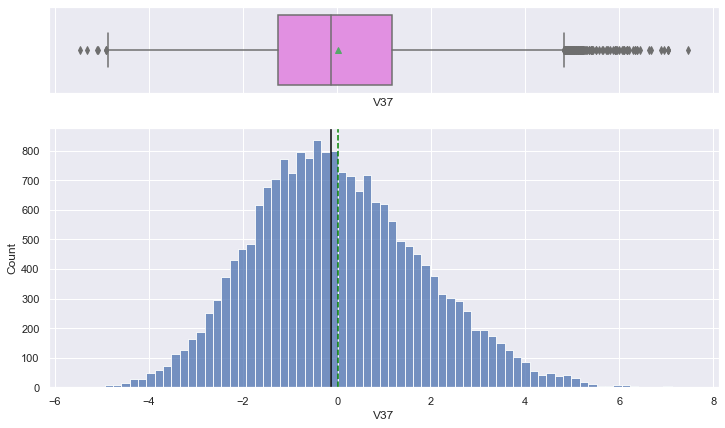

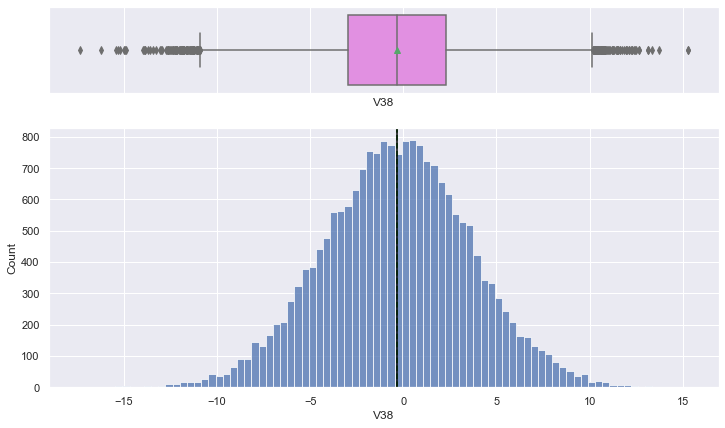

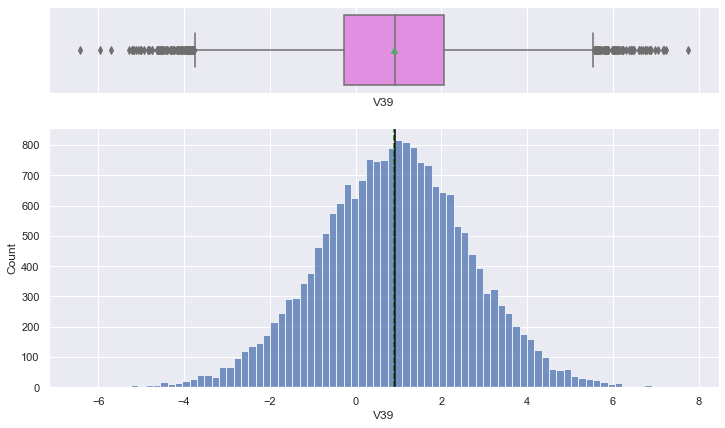

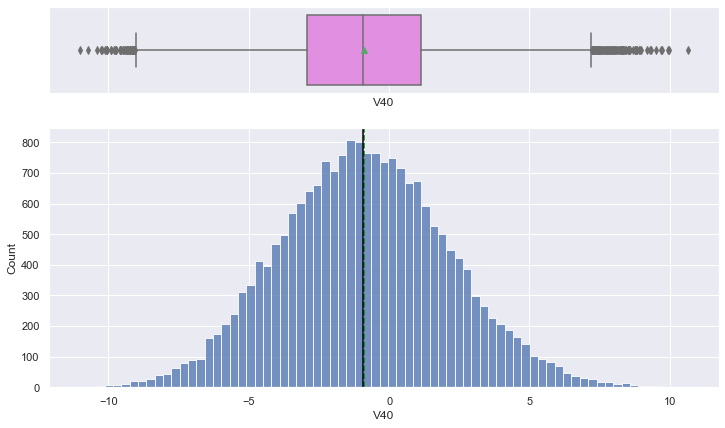

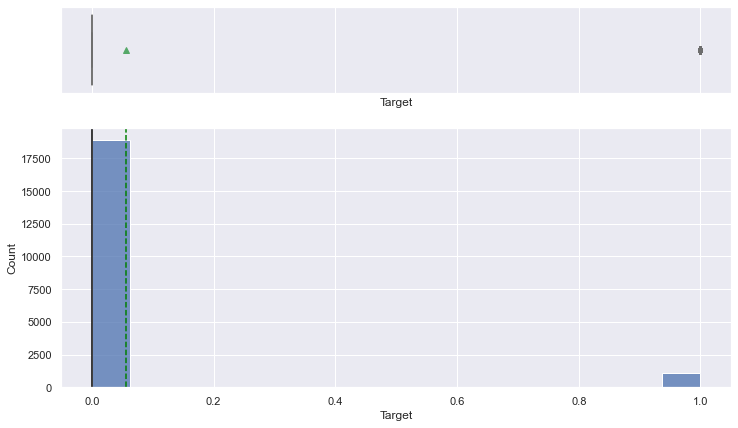

<IPython.core.display.Javascript object>

In [14]:
# running all the column plots with loop
for feature in data.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

 - All the columns have a normal distribution so no transformations seem necessary.

## Bivariate Analysis

Since all variables are float, we will look at heatmap but there is no need for barcharts.

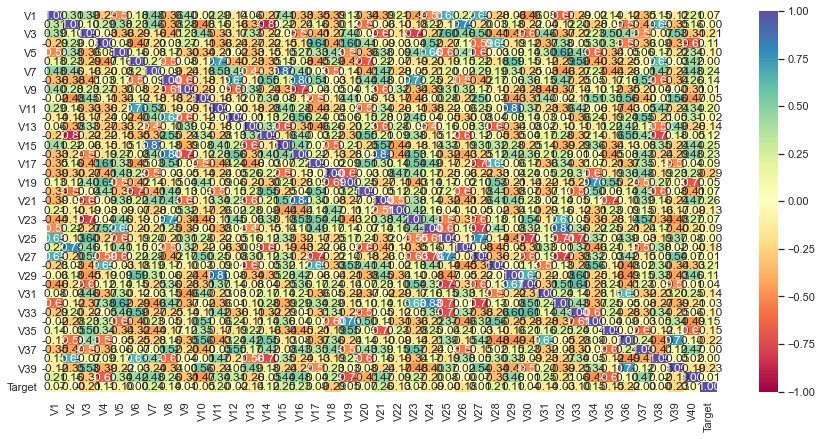

<IPython.core.display.Javascript object>

In [15]:
# Viewing  correlations
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# Data Preprocessing

In [10]:
# creating a copy of data before making changes to impute
data1 = data.copy()

<IPython.core.display.Javascript object>

In [11]:
# defining list that needs imputation
reqd_col_for_impute = ["V1", "V2"]

<IPython.core.display.Javascript object>

In [12]:
# using KNN Imputer to impute our missing values
imputer = KNNImputer(n_neighbors=5)
data1[reqd_col_for_impute] = imputer.fit_transform(data1[reqd_col_for_impute])

<IPython.core.display.Javascript object>

In [13]:
# viwewing nulls after imputation
data1.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

<IPython.core.display.Javascript object>

# Model Building

## Model Evaluation Criterion
The nature of predictions made by the classification model will translate as follows:

 - True positives (TP) are failures correctly predicted by the model.
 - False negatives (FN) are real failures in a generator where there is no detection by model.
 - False positives (FP) are failure detections in a generator where there is no failure.

## Which Metric to Optimize?


 - We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
 - We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
 - We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.


In [14]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [15]:
# creating confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

Defining scorer to be used for cross-validation and hyperparameter tuning

 - We want to reduce false negatives and will try to maximize "Recall".
 - To maximize Recall, we can use Recall as a scorer in cross-validation and hyperparameter tuning.



In [16]:
# from sklearn import metrics
# from sklearn.metrics import (
#    f1_score,
#    accuracy_score,
#    recall_score,
#    precision_score,
#    confusion_matrix,
#    roc_auc_score,
#    plot_confusion_matrix,
# )

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

## Splitting Data

In [17]:
# separating the independent and dependent variables
X = data1.drop(["Target"], axis=1)
y = data1["Target"]

<IPython.core.display.Javascript object>

In [18]:
# splitting data1 into train and temp
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

# now splitting the temp data into val and test
# X_val, X_test, y_val, y_test = train_test_split(
#    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
# )

print(X_train.shape, X_val.shape)

(14000, 40) (6000, 40)


<IPython.core.display.Javascript object>

In [25]:
# verfying the ratios of target variable are even
print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 50)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 50)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 50)

Target value ratio in y
0    0.9445
1    0.0555
Name: Target, dtype: float64
**************************************************
Target value ratio in y_train
0    0.9445
1    0.0555
Name: Target, dtype: float64
**************************************************
Target value ratio in y_val
0    0.9445
1    0.0555
Name: Target, dtype: float64
**************************************************


<IPython.core.display.Javascript object>

 ### Model Building with original data, data1

In [19]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

dtree: 0.7104549214226633
Bagging: 0.7027460711331679
Random forest: 0.7116790736145575
GBM: 0.7103887510339124
Adaboost: 0.6036145574855253
Xgboost: 0.8056575682382133

Training Performance:

dtree: 0.6816816816816816
Bagging: 0.6936936936936937
Random forest: 0.7207207207207207
GBM: 0.7237237237237237
Adaboost: 0.6126126126126126
Xgboost: 0.7837837837837838


<IPython.core.display.Javascript object>

## Building Decision Tree

In [20]:
dtree = DecisionTreeClassifier(random_state=1, max_depth=10)

# training the decision tree
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

<IPython.core.display.Javascript object>

In [27]:
print(pd.DataFrame(dtree.feature_importances_, columns=["imp"], index=X_train.columns))

          imp
V1   0.000000
V2   0.026416
V3   0.075342
V4   0.000000
V5   0.004637
V6   0.004753
V7   0.006187
V8   0.000000
V9   0.155917
V10  0.055887
V11  0.002566
V12  0.061899
V13  0.007494
V14  0.020207
V15  0.005236
V16  0.006367
V17  0.004813
V18  0.268441
V19  0.003266
V20  0.010632
V21  0.085951
V22  0.007304
V23  0.003582
V24  0.006008
V25  0.014087
V26  0.027748
V27  0.000000
V28  0.001680
V29  0.000000
V30  0.016786
V31  0.000000
V32  0.001756
V33  0.053395
V34  0.001457
V35  0.002768
V36  0.003109
V37  0.005063
V38  0.006791
V39  0.032492
V40  0.009964


<IPython.core.display.Javascript object>

In [21]:
# predictin the target for train and validation set
pred_train = dtree.predict(X_train)
pred_val = dtree.predict(X_val)

<IPython.core.display.Javascript object>

In [22]:
# checking the recall for train and validatoin sets
print(recall_score(y_train, pred_train))
print(recall_score(y_val, pred_val))

0.8172458172458172
0.6936936936936937


<IPython.core.display.Javascript object>

In [30]:
# checking the accuracy score on oversampled train and validation sets
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_val, pred_val))

0.9887142857142858
0.9775


<IPython.core.display.Javascript object>

In [23]:
# fit SMOTE on train data
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [36]:
print("Before Oversampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Oversampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Oversampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After Oversampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, shape of label '1': {}".format(X_train_over.shape))
print("After Oversampling, shape of label '0': {} \n".format(y_train_over.shape))

Before Oversampling, count of label '1': 777
Before Oversampling, count of label '0': 13223 

After Oversampling, count of label '1': 5289
After Oversampling, count of label '0': 13223 

After Oversampling, shape of label '1': (18512, 40)
After Oversampling, shape of label '0': (18512,) 



<IPython.core.display.Javascript object>

In [24]:
dtree1 = DecisionTreeClassifier(random_state=1, max_depth=10)

# training dtree model with oversampled training data
dtree1.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=10, random_state=1)

<IPython.core.display.Javascript object>

In [25]:
# predicting the target for train and validation set
pred_train = dtree1.predict(X_train_over)
pred_val = dtree1.predict(X_val)

<IPython.core.display.Javascript object>

In [39]:
# checking the recall score on oversampled train and validation
print(recall_score(y_train_over, pred_train))
print(recall_score(y_val, pred_val))

0.9202117602571375
0.7477477477477478


<IPython.core.display.Javascript object>

In [40]:
# checking the accuracy score on oversampled train and validation set
print(accuracy_score(y_train_over, pred_train))
print(accuracy_score(y_val, pred_val))

0.9723422644770959
0.966


<IPython.core.display.Javascript object>

Text(39.5, 0.5, 'Actual Values')

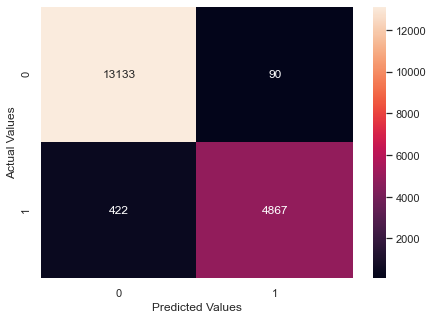

<IPython.core.display.Javascript object>

In [41]:
# confusion matrix for oversampled train data
cm = confusion_matrix(y_train_over, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [26]:
# random undersampler data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [43]:
print("Before Undersampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Undersampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Undersampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, shape of label '1': {}".format(X_train_un.shape))
print("After Undersampling, shape of label '0': {} \n".format(y_train_un.shape))

Before Undersampling, count of label '1': 777
Before Undersampling, count of label '0': 13223 

After Undersampling, count of label '1': 777
After Undersampling, count of label '0': 777 

After Undersampling, shape of label '1': (1554, 40)
After Undersampling, shape of label '0': (1554,) 



<IPython.core.display.Javascript object>

In [27]:
dtree2 = DecisionTreeClassifier(random_state=1, max_depth=10)

# training dtree with undersampled training set
dtree2.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=10, random_state=1)

<IPython.core.display.Javascript object>

In [28]:
# predicting the target for train and validation sets
pred_train = dtree2.predict(X_train_un)
pred_val = dtree2.predict(X_val)

<IPython.core.display.Javascript object>

In [46]:
# checking recall on underesampled train and validation sets
print(recall_score(y_train_un, pred_train))
print(recall_score(y_val, pred_val))

0.9510939510939511
0.8138138138138138


<IPython.core.display.Javascript object>

In [47]:
# checking accuracy for undersampled train and validation sets
print(accuracy_score(y_train_un, pred_train))
print(accuracy_score(y_val, pred_val))

0.9736164736164736
0.8836666666666667


<IPython.core.display.Javascript object>

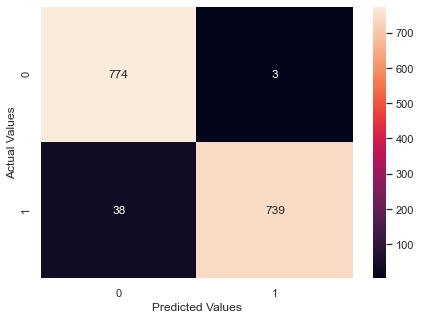

<IPython.core.display.Javascript object>

In [48]:
# confusion matrix for undersampled train data
cm = confusion_matrix(y_train_un, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

### Hyperparameter Tuning of DTree

#### RandomizedSearchCV DTRee with Original Data

In [52]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5315384615384615:


<IPython.core.display.Javascript object>

In [29]:
# building dtree with best parameters
dtree_tuned = DecisionTreeClassifier(
    min_samples_leaf=7, min_impurity_decrease=0.0001, max_leaf_nodes=15, max_depth=5
)

# fitting model on train data
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

<IPython.core.display.Javascript object>

In [30]:
# calculating different metrics on train set
dtree_random_train = model_performance_classification_sklearn(
    dtree_tuned, X_train, y_train
)

print("Training Performance:")
dtree_random_train

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.9715,0.574003,0.867704,0.690937


<IPython.core.display.Javascript object>

In [31]:
# calculating different metrics on train set
dtree_random_val = model_performance_classification_sklearn(dtree_tuned, X_val, y_val)

print("Validation Performance:")
dtree_random_val

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.968833,0.525526,0.857843,0.651769


<IPython.core.display.Javascript object>

#### RandomizedSearchCV DTree with Oversampled Data

In [51]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8201932208179157:


<IPython.core.display.Javascript object>

#### RandomizedSearchCV DTree with Undersampled Data

In [53]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 20),
    "min_samples_leaf": [1, 2, 5, 7],
    "max_leaf_nodes": [5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 16} with CV score=0.8481306865177831:


<IPython.core.display.Javascript object>

### Hyperparameter Tuning of Bagging Classifier

#### RandomizedSearchCV Bagging Classifier with Original Data

In [57]:
%%time

# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 'max_features': [0.7,0.8,0.9], 'n_estimators' : [30,50,70], }

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.7284119106699752:
Wall time: 12min 51s


<IPython.core.display.Javascript object>

In [32]:
# building bagging classifier with best parameters
bagging_tuned_random = BaggingClassifier(
    n_estimators=70, max_samples=0.9, max_features=0.8
)

# fitting model on train data
bagging_tuned_random.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70)

<IPython.core.display.Javascript object>

In [68]:
# calculating different metrics on train set
bagging_random_train = model_performance_classification_sklearn(
    bagging_tuned_random, X_train, y_train
)

print("Training Performance:")
bagging_random_train

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.999643,0.993565,1.0,0.996772


<IPython.core.display.Javascript object>

In [69]:
# calculating different metrics on validation set
bagging_random_val = model_performance_classification_sklearn(
    bagging_tuned_random, X_val, y_val
)

print("Validation Performance:")
bagging_random_val

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.9835,0.717718,0.979508,0.828423


<IPython.core.display.Javascript object>

#### GridSearchCV Bagging Classifier with Original Data

In [55]:
%%time

#defining model
model = BaggingClassifier(random_state=1)

param_grid = { 'max_samples': [0.8,0.9,1], 'max_features': [0.7,0.8,0.9], 'n_estimators' : [30,50,70], }

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs= -1)

#fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'max_features': 0.8, 'max_samples': 0.9, 'n_estimators': 50} 
Score: 0.7323076923076923
Wall time: 23min 18s


<IPython.core.display.Javascript object>

In [71]:
# building bagging classifier with best parameters
bagging_tuned_grid = BaggingClassifier(
    n_estimators=50, max_samples=0.9, max_features=0.8
)

# fitting model on train data
bagging_tuned_grid.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50)

<IPython.core.display.Javascript object>

In [72]:
# calculating different metrics on train set
bagging_grid_train = model_performance_classification_sklearn(
    bagging_tuned_grid, X_train, y_train
)

print("Training Performance:")
bagging_grid_train

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.999286,0.98713,1.0,0.993523


<IPython.core.display.Javascript object>

In [73]:
# calculating different metrics on validation set
bagging_grid_val = model_performance_classification_sklearn(
    bagging_tuned_grid, X_val, y_val
)

print("Validation Performance:")
bagging_grid_val

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.983333,0.714715,0.979424,0.826389


<IPython.core.display.Javascript object>

#### RandomizedSearchCV Bagging Classifier with Undersampled Data

In [94]:
%%time

# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 'max_features': [0.7,0.8,0.9], 'n_estimators' : [30,50,70], }

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.8919189412737799:
Wall time: 1min


<IPython.core.display.Javascript object>

In [33]:
# building bagging classifier with best parameters
bagging_tuned_random_un = BaggingClassifier(
    n_estimators=70, max_samples=0.9, max_features=0.9
)

# fitting model on train data
bagging_tuned_random_un.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70)

<IPython.core.display.Javascript object>

In [34]:
# calculating different metrics on train set
bagging_random_train_un = model_performance_classification_sklearn(
    bagging_tuned_random_un, X_train_un, y_train_un
)

print("Training Performance:")
bagging_random_train_un

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.998069,0.996139,1.0,0.998066


<IPython.core.display.Javascript object>

In [35]:
# calculating different metrics on validation set
bagging_random_val_un = model_performance_classification_sklearn(
    bagging_tuned_random_un, X_val, y_val
)

print("Validation Performance:")
bagging_random_val_un

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.947,0.870871,0.513274,0.64588


<IPython.core.display.Javascript object>

#### RandomizedSearchCV Random Forest with Original Data

In [58]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.6962779156327544:


<IPython.core.display.Javascript object>

In [76]:
# building random forest with best parameters
rforest_tuned_random = RandomForestClassifier(
    n_estimators=300, min_samples_leaf=1, max_samples=0.6, max_features="sqrt"
)

# fitting model on train data
rforest_tuned_random.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=300)

<IPython.core.display.Javascript object>

In [77]:
# calculating different metrics on train set
rforest_random_train = model_performance_classification_sklearn(
    rforest_tuned_random, X_train, y_train
)

print("Training Performance:")
rforest_random_train

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.994786,0.907336,0.998584,0.950775


<IPython.core.display.Javascript object>

In [78]:
# calculating different metrics on validation set
rforest_random_val = model_performance_classification_sklearn(
    rforest_tuned_random, X_val, y_val
)

print("Validation Performance:")
rforest_random_val

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.983333,0.708709,0.987448,0.825175


<IPython.core.display.Javascript object>

#### RandomizedSearchCV Random Forest with Undersampled Data

In [98]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8996195202646815:


<IPython.core.display.Javascript object>

In [36]:
# building random forest with best parameters
rforest_tuned_random_un = RandomForestClassifier(
    n_estimators=250, min_samples_leaf=1, max_samples=0.6, max_features="sqrt"
)

# fitting model on train data
rforest_tuned_random_un.fit(X_train_un, y_train_un)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250)

<IPython.core.display.Javascript object>

In [37]:
# calculating different metrics on train set
rforest_random_train_un = model_performance_classification_sklearn(
    rforest_tuned_random_un, X_train_un, y_train_un
)

print("Training Performance:")
rforest_random_train_un

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.98713,0.97426,1.0,0.986962


<IPython.core.display.Javascript object>

In [38]:
# calculating different metrics on validation set
rforest_random_val_un = model_performance_classification_sklearn(
    rforest_tuned_random_un, X_val, y_val
)

print("Validation Performance:")
rforest_random_val_un

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.951167,0.888889,0.536232,0.668927


<IPython.core.display.Javascript object>

#### GridSearchCV Random Forest with Original Data

In [56]:
%%time

#defining model
model = RandomForestClassifier(random_state=1)

param_grid = { "n_estimators": [200,250,300], "min_samples_leaf": np.arange(1, 4), "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], "max_samples": np.arange(0.4, 0.7, 0.1) }

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs= -1)

#fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 1, 'n_estimators': 300} 
Score: 0.6962779156327544
Wall time: 18min 7s


<IPython.core.display.Javascript object>

In [79]:
# building random forest with best parameters
rforest_tuned_grid = RandomForestClassifier(
    n_estimators=300, min_samples_leaf=1, max_samples=0.6, max_features="sqrt"
)

# fitting model on train data
rforest_tuned_grid.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=300)

<IPython.core.display.Javascript object>

In [80]:
# calculating different metrics on train set
rforest_grid_train = model_performance_classification_sklearn(
    rforest_tuned_grid, X_train, y_train
)

print("Training Performance:")
rforest_grid_train

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.994714,0.906049,0.998582,0.950067


<IPython.core.display.Javascript object>

In [81]:
# calculating different metrics on validation set
rforest_grid_val = model_performance_classification_sklearn(
    rforest_tuned_grid, X_val, y_val
)

print("Validation Performance:")
rforest_grid_val

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.983667,0.711712,0.991632,0.828671


<IPython.core.display.Javascript object>

#### GridSearchCV Gradient Boosting with Original Data

In [59]:
%%time

#defining model
model = GradientBoostingClassifier(random_state=1)

param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs= -1)

#fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'learning_rate': 0.2, 'max_features': 0.5, 'n_estimators': 125, 'subsample': 0.7} 
Score: 0.7657733664185277
Wall time: 8min 30s


<IPython.core.display.Javascript object>

In [82]:
# building gradient boosting classifier with best parameters
gboost_tuned_grid = GradientBoostingClassifier(
    learning_rate=0.2, max_features=0.5, n_estimators=125, subsample=0.7
)

# fitting model on train data
gboost_tuned_grid.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.7)

<IPython.core.display.Javascript object>

In [83]:
# calculating different metrics on train set
gboost_grid_train = model_performance_classification_sklearn(
    gboost_tuned_grid, X_train, y_train
)

print("Training Performance:")
gboost_grid_train

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.992857,0.895753,0.973427,0.932976


<IPython.core.display.Javascript object>

In [84]:
# calculating different metrics on validation set
gboost_grid_val = model_performance_classification_sklearn(
    gboost_tuned_grid, X_val, y_val
)

print("Validation Performance:")
gboost_grid_val

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.980333,0.72973,0.896679,0.804636


<IPython.core.display.Javascript object>

#### RandomizedSearchCV Gradient Boosting with Original Data

In [61]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.7657733664185277:
Wall time: 3min 28s


<IPython.core.display.Javascript object>

In [85]:
# building gradient boosting classifier with best parameters
gboost_tuned_random = GradientBoostingClassifier(
    learning_rate=0.2, max_features=0.5, n_estimators=125, subsample=0.7
)

# fitting model on train data
gboost_tuned_random.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.7)

<IPython.core.display.Javascript object>

In [86]:
# calculating different metrics on train set
gboost_random_train = model_performance_classification_sklearn(
    gboost_tuned_random, X_train, y_train
)

print("Training Performance:")
gboost_random_train

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.994786,0.911197,0.994382,0.950974


<IPython.core.display.Javascript object>

In [87]:
# calculating different metrics on validation set
gboost_random_val = model_performance_classification_sklearn(
    gboost_tuned_random, X_val, y_val
)

print("Validation Performance:")
gboost_random_val

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.9815,0.723724,0.926923,0.812816


<IPython.core.display.Javascript object>

#### RandomizedSearchCV Gradient Boosting with Undersampled Data

In [104]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.8944747725392886:
Wall time: 26.4 s


<IPython.core.display.Javascript object>

In [39]:
# building gradient boosting classifier with best parameters
gboost_tuned_random_un = GradientBoostingClassifier(
    learning_rate=0.2, max_features=0.5, n_estimators=125, subsample=0.5
)

# fitting model on train data
gboost_tuned_random_un.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.5)

<IPython.core.display.Javascript object>

In [40]:
# calculating different metrics on train set
gboost_random_train_un = model_performance_classification_sklearn(
    gboost_tuned_random_un, X_train_un, y_train_un
)

print("Training Performance:")
gboost_random_train_un

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.940154,0.880309,1.0,0.936345


<IPython.core.display.Javascript object>

In [41]:
# calculating different metrics on validation set
gboost_random_val_un = model_performance_classification_sklearn(
    gboost_tuned_random_un, X_val, y_val
)

print("Validation Performance:")
gboost_random_val_un

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.978667,0.732733,0.862191,0.792208


<IPython.core.display.Javascript object>

#### GridSearchCV XGBoost with Original Data

In [62]:
%%time

#defining model
model = XGBClassifier(random_state=1)

param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs= -1)

#fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

[21:22:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:22:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters:{'learning_rate': 0.2, 'max_features': 0.5, 'n_estimators': 125, 'subsample': 0.7} 
Score: 0.8004797353184449
Wall time: 13min 48s


<IPython.core.display.Javascript object>

In [88]:
# building gradient boosting classifier with best parameters
xgboost_tuned_grid = XGBClassifier(
    learning_rate=0.2, max_features=0.5, n_estimators=125, subsample=0.7
)

# fitting model on train data
xgboost_tuned_grid.fit(X_train, y_train)

[22:33:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:33:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, max_features=0.5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=125, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [89]:
# calculating different metrics on train set
xgboost_grid_train = model_performance_classification_sklearn(
    xgboost_tuned_grid, X_train, y_train
)

print("Training Performance:")
xgboost_grid_train

Training Performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [90]:
# calculating different metrics on validation set
xgboost_grid_val = model_performance_classification_sklearn(
    xgboost_tuned_grid, X_val, y_val
)

print("Validation Performance:")
xgboost_grid_val

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.988,0.801802,0.978022,0.881188


<IPython.core.display.Javascript object>

#### RandomizedSearchCV XGBoost with Original Data

In [64]:
%%time

# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

[21:31:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:31:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.8004797353184449:
Wall time: 5min 16s


<IPython.core.display.Javascript object>

In [91]:
# building gradient boosting classifier with best parameters
xgboost_tuned_random = XGBClassifier(
    learning_rate=0.2, max_features=0.5, n_estimators=125, subsample=0.7
)

# fitting model on train data
xgboost_tuned_random.fit(X_train, y_train)

[22:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, max_features=0.5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=125, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [92]:
# calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgboost_tuned_random, X_train, y_train
)

print("Training Performance:")
xgboost_random_train

Training Performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [93]:
# calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(
    xgboost_tuned_random, X_val, y_val
)

print("Validation Performance:")
xgboost_random_val

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.988,0.801802,0.978022,0.881188


<IPython.core.display.Javascript object>

The best way to treat our imbalanced data is with undersampling, RUS. We will couple this with Randomized Search on these models to choose the best model before testing.

#### RandomizedSearchCV XGBoost with Undersampled Data

In [108]:
%%time

# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

[23:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.05} with CV score=0.8970636889991729:
Wall time: 41.2 s


<IPython.core.display.Javascript object>

In [42]:
# building gradient boosting classifier with best parameters
xgboost_tuned_random_un = XGBClassifier(
    learning_rate=0.05, max_features=0.7, n_estimators=125, subsample=0.5
)

# fitting model on train data
xgboost_tuned_random_un.fit(X_train, y_train)

[00:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, max_features=0.7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=125, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [43]:
# calculating different metrics on train set
xgboost_random_train_un = model_performance_classification_sklearn(
    xgboost_tuned_random_un, X_train_un, y_train_un
)

print("Training Performance:")
xgboost_random_train_un

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.941441,0.882883,1.0,0.937799


<IPython.core.display.Javascript object>

In [44]:
# calculating different metrics on validation set
xgboost_random_val_un = model_performance_classification_sklearn(
    xgboost_tuned_random_un, X_val, y_val
)

print("Validation Performance:")
xgboost_random_val_un

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.9855,0.753754,0.980469,0.852292


<IPython.core.display.Javascript object>

#### Comparison of Undersampled Models

 - We see from above that the undersampled data seems to provide the most balanced data from when we built the first decision tree.
 - We also find that our Randomized Search CV typically is giving us the best parameters to work with.
 - With this knowledge, we decide to compare our models with undersampled data and the hyperparameters tuned with Randomized Search CV.

In [45]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        bagging_random_train_un.T,
        gboost_random_train_un.T,
        xgboost_random_train_un.T,
        rforest_random_train_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging Tuned Undersample with RandomSearch",
    "Gradient Boost Tuned Undersample with RandomSearch",
    "XG Boost Tuned Undersample with RandomSearch",
    "Random Forest Tuned Undersample with RandomSearch",
]
print("Training Performance Comparison:")
models_train_comp_df

Training Performance Comparison:


,Bagging Tuned Undersample with RandomSearch,Gradient Boost Tuned Undersample with RandomSearch,XG Boost Tuned Undersample with RandomSearch,Random Forest Tuned Undersample with RandomSearch
Accuracy,0.998069,0.940154,0.941441,0.987130
Recall,0.996139,0.880309,0.882883,0.974260
Precision,1.000000,1.000000,1.000000,1.000000
F1,0.998066,0.936345,0.937799,0.986962


<IPython.core.display.Javascript object>

In [46]:
# training validation comparison
models_val_comp_df = pd.concat(
    [
        bagging_random_val_un.T,
        gboost_random_val_un.T,
        xgboost_random_val_un.T,
        rforest_random_val_un.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Bagging Tuned Undersample with RandomSearch",
    "Gradient Boost Tuned Undersample with RandomSearch",
    "XG Boost Tuned Undersample with RandomSearch",
    "Random Forest Tuned Undersample with RandomSearch",
]
print("Training Performance Comparison:")
models_val_comp_df

Training Performance Comparison:


,Bagging Tuned Undersample with RandomSearch,Gradient Boost Tuned Undersample with RandomSearch,XG Boost Tuned Undersample with RandomSearch,Random Forest Tuned Undersample with RandomSearch
Accuracy,0.947000,0.978667,0.985500,0.951167
Recall,0.870871,0.732733,0.753754,0.888889
Precision,0.513274,0.862191,0.980469,0.536232
F1,0.645880,0.792208,0.852292,0.668927


<IPython.core.display.Javascript object>

As shown above, we can see that the Random Forest model and the Bagging Classifier seem to be pretty close to even. We will go with the Random Forest model though since it looks like there is less of an overfit on the train data. 



#### Testing Model with Unseen Test Data

In [48]:
#loading test data
test_data = pd.read_csv("Test.csv")

<IPython.core.display.Javascript object>

In [51]:
test_data.shape

(5000, 41)

<IPython.core.display.Javascript object>

In [54]:
test_data.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

<IPython.core.display.Javascript object>

In [55]:
test_data1 = test_data.copy()

<IPython.core.display.Javascript object>

In [56]:
test_data1 = test_data1.dropna()

<IPython.core.display.Javascript object>

In [57]:
test_data1.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

<IPython.core.display.Javascript object>

In [58]:
# separating the independent and dependent variables
X_test = test_data1.drop(["Target"], axis=1)
y_test = test_data1["Target"]

<IPython.core.display.Javascript object>

In [59]:
#fitting Random Forest Model on test data
rforest_tuned_random_un.fit(X_test, y_test)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250)

<IPython.core.display.Javascript object>

In [60]:
# calculating different metrics on train set
rforest_random_test_un = model_performance_classification_sklearn(
    rforest_tuned_random_un, X_test, y_test
)

<IPython.core.display.Javascript object>

In [61]:
print("Testing Performance:")
rforest_random_test_un

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.992183,0.861702,1.0,0.925714


<IPython.core.display.Javascript object>

Let's view all three, Train, Validation, and Test together.

In [63]:
# random forest model comparison
models_rforest_comp_df = pd.concat(
    [rforest_random_train_un.T, rforest_random_val_un.T, rforest_random_test_un.T,],
    axis=1,
)
models_rforest_comp_df.columns = [
    "Tuned Random Forest on Train",
    "Tuned Random Forest on Validation",
    "Tuned Random Forest on Test",
]
print("Random Forest Comparison:")
models_rforest_comp_df

Random Forest Comparison:


,Tuned Random Forest on Train,Tuned Random Forest on Validation,Tuned Random Forest on Test
Accuracy,0.987130,0.951167,0.992183
Recall,0.974260,0.888889,0.861702
Precision,1.000000,0.536232,1.000000
F1,0.986962,0.668927,0.925714


<IPython.core.display.Javascript object>

This seems to be the best model as our recall is high as well as Accuracy, Precision, and F1.